Checking ratio of update norms to parameter norm values to evaluate LR scale

In [1]:
import pylearn2.utils
import pylearn2.config
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import os.path

Using gpu device 0: Tesla K20c


Model trained on on 0.1 split of data

In [49]:
model = pylearn2.utils.serial.load(os.path.expandvars('${DATA_DIR}/plankton/models/learning_rate_experiment/fewer_conv_channel_no_dropout.pkl'))

In [50]:
print(model)

h1
	Input space: Conv2DSpace(shape=(48, 48), num_channels=1, axes=('b', 0, 1, 'c'), dtype=float32)
	Total input dimension: 2304
h2
	Input space: Conv2DSpace(shape=(26, 26), num_channels=48, axes=('b', 'c', 0, 1), dtype=float32)
	Total input dimension: 32448
h3
	Input space: Conv2DSpace(shape=(28, 28), num_channels=48, axes=('b', 'c', 0, 1), dtype=float32)
	Total input dimension: 37632
h4
	Input space: Conv2DSpace(shape=(15, 15), num_channels=48, axes=('b', 'c', 0, 1), dtype=float32)
	Total input dimension: 10800
y
	Input space: VectorSpace(dim=512, dtype=float32)
	Total input dimension: 512


Plot train and valid set NLL

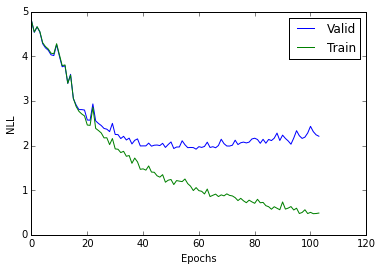

In [51]:
plt.plot(model.monitor.channels['valid_y_y_1_nll'].val_record)
plt.plot(model.monitor.channels['train_y_y_1_nll'].val_record)
plt.legend(['Valid', 'Train'])
plt.ylabel('NLL')
plt.xlabel('Epochs')

Woo definite overfitting!

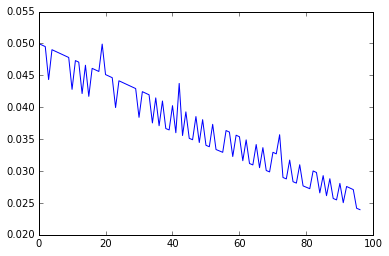

In [47]:
plt.plot(model.monitor.channels['learning_rate'].val_record)

Plot ratio of update norms to parameter norms across epochs for different layers

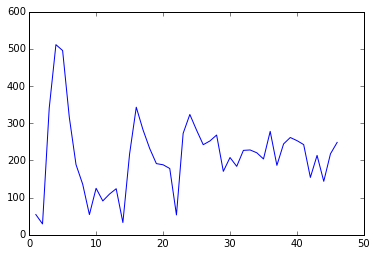

In [25]:
h1_W_up_norms = np.array([float(v) for v in model.monitor.channels['mean_update_h1_W_kernel_norm_mean'].val_record])
h1_W_norms = np.array([float(v) for v in model.monitor.channels['valid_h1_kernel_norms_mean'].val_record])
plt.plot(h1_W_norms / h1_W_up_norms)

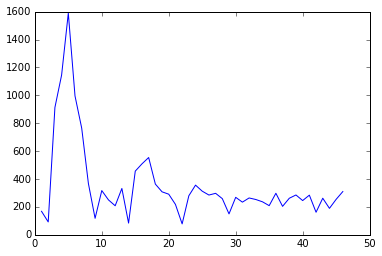

In [26]:
h2_W_up_norms = np.array([float(v) for v in model.monitor.channels['mean_update_h2_W_kernel_norm_mean'].val_record])
h2_W_norms = np.array([float(v) for v in model.monitor.channels['valid_h2_kernel_norms_mean'].val_record])
plt.plot(h2_W_norms / h2_W_up_norms)

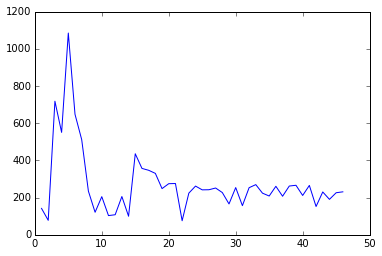

In [27]:
h3_W_up_norms = np.array([float(v) for v in model.monitor.channels['mean_update_h3_W_kernel_norm_mean'].val_record])
h3_W_norms = np.array([float(v) for v in model.monitor.channels['valid_h3_kernel_norms_mean'].val_record])
plt.plot(h3_W_norms / h3_W_up_norms)

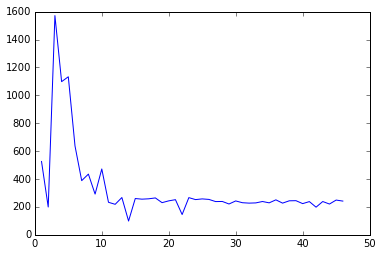

In [28]:
h4_W_up_norms = np.array([float(v) for v in model.monitor.channels['mean_update_h4_W_col_norm_mean'].val_record])
h4_W_norms = np.array([float(v) for v in model.monitor.channels['valid_h4_col_norms_mean'].val_record])
plt.plot(h4_W_norms / h4_W_up_norms)

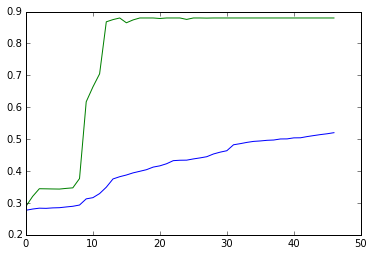

In [30]:
plt.plot(model.monitor.channels['valid_h3_kernel_norms_mean'].val_record)
plt.plot(model.monitor.channels['valid_h3_kernel_norms_max'].val_record)